<a href="https://colab.research.google.com/github/Harpreetk01/Google_Play_Store_EDA/blob/main/Google_Play_Store_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DA Datasets/googleplaystore.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


##**Data Preparation and Cleaning**

1. Look at some infromation about the data & the columns
2. Fix any missing or incorrect values

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
len(df.columns)

13

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **Finding Missing Values and Cleaning Data**

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

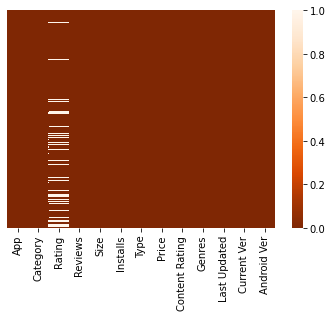

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'Oranges_r')
plt.show()

 - Maximum null values is present in the Rating column
 - And, other data has very less null values, so we can leave it or remove it from data, it doesn't affect the any column or 
   data at all

In [ ]:
#Droping not usefull columns
df = df.drop(['Android Ver', 'Current Ver', 'Last Updated','Size'], axis = 1)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

####**Filling Rating Column with Mean Value**

In [ ]:
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [ ]:
df['Rating'].isnull().sum()

0

###**Cleaning Installs Columns**

In [8]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [9]:
#Removing '+' sign 
#Removing commas ','
#Changing datatype
#Replace "Free" and'Zero
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+'))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ''))
df['Installs'] = df['Installs'].replace("Free", '0')
df['Installs']=df['Installs'].astype('int')

In [10]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Installs        10841 non-null  int64  
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 762.4+ KB


###**Cleaning Price Columns**

In [18]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [19]:
#Remove dollar"$" sign
#Rplacing 'Everyone' word with '0'
#Converting 'String' datatype into 'float'
df['Price'] = df['Price'].apply(lambda x : x.strip("$"))
df['Price'] = df['Price'].str.replace("Everyone", '0')
df['Price'] = df['Price'].astype('float')

In [20]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### **Dropping Null Values**

In [ ]:
df.dropna(inplace = True)
df.head(8)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,50000,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,50000,Free,0.0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,1000000,Free,0.0,Everyone,Art & Design


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10354 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10354 non-null  object 
 1   Category        10354 non-null  object 
 2   Rating          10354 non-null  float64
 3   Reviews         10354 non-null  object 
 4   Installs        10354 non-null  int64  
 5   Type            10354 non-null  object 
 6   Price           10354 non-null  float64
 7   Content Rating  10354 non-null  object 
 8   Genres          10354 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 808.9+ KB


###**Dropping duplicate values**

In [ ]:
df.duplicated().sum()

485

In [ ]:
df.shape

(10839, 9)

In [ ]:
#After removing the duplicate values
df.drop_duplicates(inplace = True)
df.shape

(10354, 9)

**Rest of the columns donot have any null values, jumping to the visualisation**

#**Visualisation**

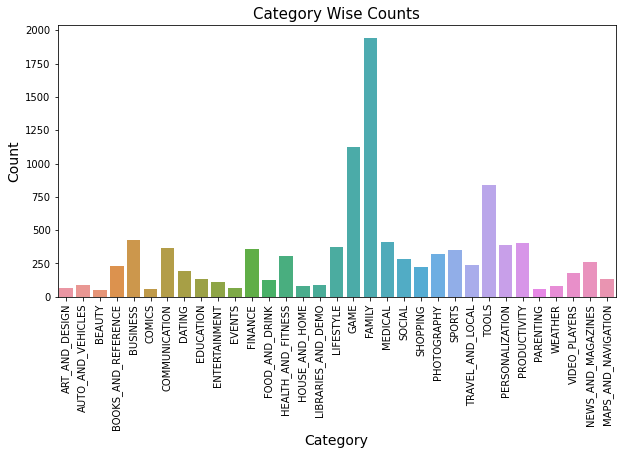

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Category')
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Category Wise Counts', fontsize = 15)
plt.xticks(rotation = 90)

plt.show()

- Family, Game, Business, productivity and personalization this are the few app category has higher value count 
- That means this few apps has higher download rate and most liked apps

##**Highest Rating App**

In [ ]:
df['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10354, dtype: object

In [ ]:
App = df['App'].value_counts()
App

ROBLOX                                           9
8 Ball Pool                                      7
Zombie Catchers                                  6
Helix Jump                                       6
Bubble Shooter                                   6
                                                ..
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
Volume Slider Like Android P Volume Control      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9658, dtype: int64

In [ ]:
#App smaller than 5
App_lessthan5 = App[App < 5]
App_lessthan5

Angry Birds Rio                                  4
Yahoo Fantasy Sports - #1 Rated Fantasy App      4
Clash Royale                                     4
Pou                                              4
PUBG MOBILE                                      4
                                                ..
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
Volume Slider Like Android P Volume Control      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9643, dtype: int64

In [ ]:
def handelApp (values):
  if values in App_lessthan5:
    return 'others'
  else:
    return values
df['App'] = df['App'].apply(handelApp)
df['App'].value_counts()

others                            10270
ROBLOX                                9
8 Ball Pool                           7
Bubble Shooter                        6
Helix Jump                            6
Zombie Catchers                       6
Duolingo: Learn Languages Free        5
Subway Surfers                        5
Candy Crush Saga                      5
slither.io                            5
Temple Run 2                          5
Granny                                5
Angry Birds Classic                   5
Zombie Tsunami                        5
Farm Heroes Saga                      5
Bowmasters                            5
Name: App, dtype: int64

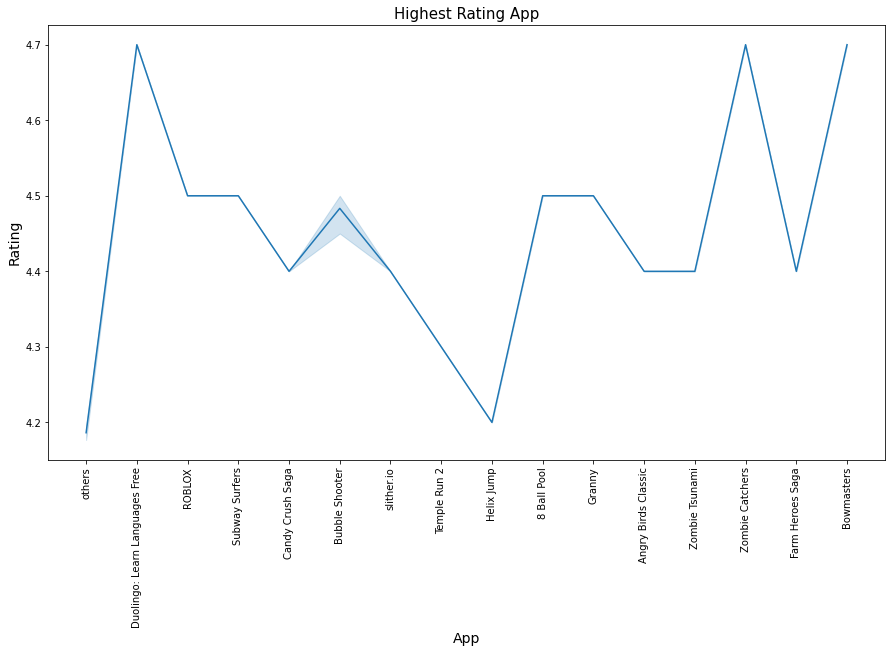

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(x = df['App'], y = df['Rating']) 
plt.xlabel('App', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.title('Highest Rating App', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### **Top 10 highest rating apps**


In [13]:
len(df['App'].unique())

9660

In [14]:
len(df['App'])

10841

In [21]:
df.groupby('App').sum().sort_values(by = 'Rating', ascending = False).head(11)

,Rating,Installs,Price
App,,,
ROBLOX,40.5,900000000,0.0
"CBS Sports App - Scores, News, Stats & Watch Live",34.4,40000000,0.0
Duolingo: Learn Languages Free,32.9,700000000,0.0
8 Ball Pool,31.5,700000000,0.0
Candy Crush Saga,30.8,3500000000,0.0
ESPN,29.4,70000000,0.0
Zombie Catchers,28.2,60000000,0.0
Bowmasters,28.2,300000000,0.0
Sniper 3D Gun Shooter: Free Shooting Games - FPS,27.6,600000000,0.0


###**Top 10 Lowest Rating Apps**

In [22]:
df.groupby('App').sum().sort_values(by = 'Rating', ascending = True).head(20)

,Rating,Installs,Price
App,,,
"""i DT"" Fútbol. Todos Somos Técnicos.",0.0,500,0.00
Málaga CF Wallpapers 4 Fans,0.0,10,0.00
México City D.F News,0.0,100,0.00
N+ News Bulgaria,0.0,50,0.00
Weather Data CH,0.0,500,2.99
Carpooling FH Hagenberg,0.0,100,0.00
Cargo de Praça PM DF,0.0,10,2.99
NATIVE ENTERTAINMENT MAGAZINE - ISSUE # 1,0.0,10,0.00
Cardio-FR,0.0,10000,0.00


##**Paid&Free Apps Counts**

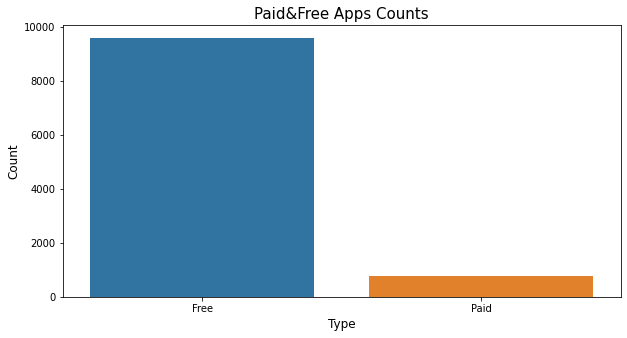

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Type')
plt.xlabel("Type", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Paid&Free Apps Counts", fontsize = 15)
plt.show()

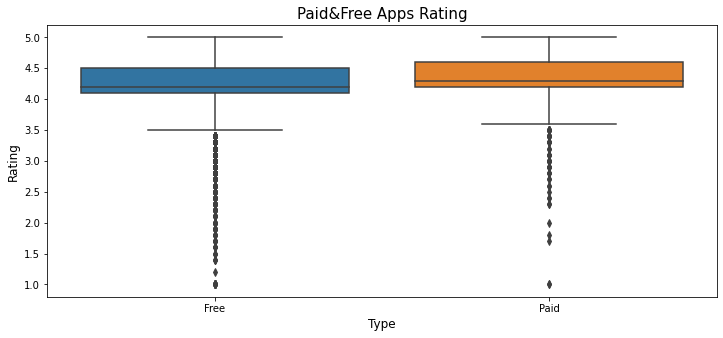

In [ ]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'Type', y = 'Rating', data = df)
plt.xlabel("Type", fontsize = 12)
plt.ylabel("Rating", fontsize = 12)
plt.title("Paid&Free Apps Rating", fontsize = 15)
plt.show()

According to the graph free app rating is somewhere around '4.2' and paid appa rating '4.4'. There is not much difference but still the paid is more rating than free app

##**Age group wise rating**

In [ ]:
Content_Rating = df.groupby('Content Rating').sum()['Rating'].reset_index()
Content_Rating

,Content Rating,Rating
0,Adults only 18+,12.900000
1,Everyone,35051.426412
2,Everyone 10+,1598.593413
3,Mature 17+,1846.060179
4,Teen,4852.073951
5,Unrated,8.293338


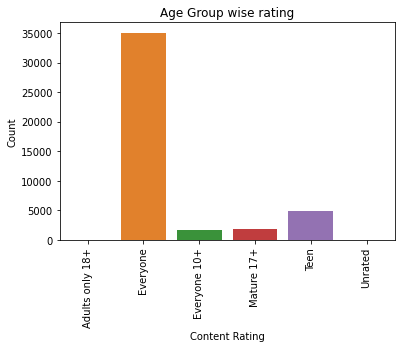

In [ ]:
sns.barplot(x = Content_Rating['Content Rating'], y = Content_Rating['Rating'] )
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Age Group wise rating')
plt.xticks(rotation = 90)
plt.show()

##**Top 10 highest installed apps**

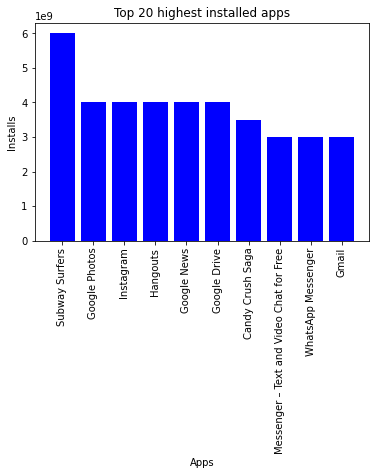

In [12]:
install = df.groupby('App')['Installs'].sum().sort_values(ascending = False).head(10).reset_index()
plt.bar('App', 'Installs', data = install, color = 'blue')
plt.xlabel('Apps')
plt.ylabel('Installs')
plt.xticks(rotation = 90)
plt.title('Top 20 highest installed apps')
plt.show()

##**Top 10 Paids App**

In [25]:
paid_apps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)

In [32]:
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40M,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set

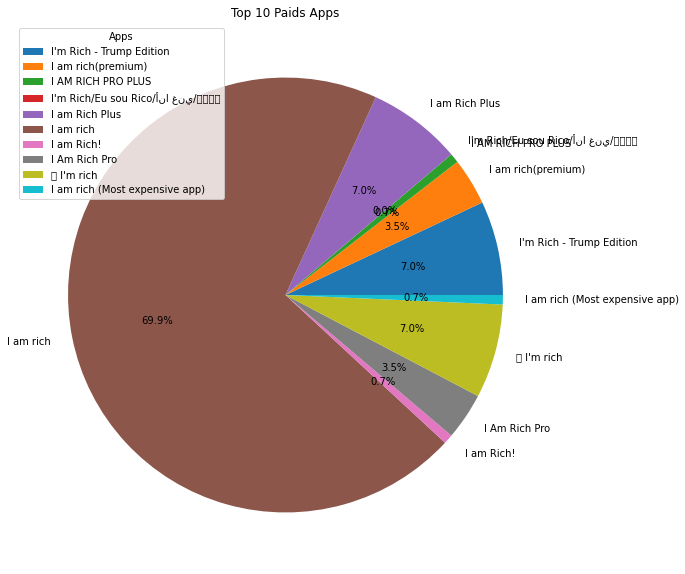

In [44]:
plt.figure(figsize=(10,10))
plt.pie(paid_apps.Installs, labels = paid_apps.App, autopct='%1.1f%%')
plt.title('Top 10 Paids Apps')
plt.legend(paid_apps.App, title='Apps', fontsize = 'medium')
plt.show()

**Top five Paid apps are:-**

1. I am Rich
2. I am Rich - Trump Editiom
3. I am Rich Plus
4. I am rich premium
5. I am rich pro